# Perfil do aluno dos cursos técnicos do Senai Joinville
Neste trabalho será feita uma análise exploratória para identificar o perfil do estudante dos cursos técnicos do Senai Joinville.

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando os dados
dados1 = pd.read_csv("TECNICO_PERFIL.csv", encoding = 'latin-1')
dados1.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [3]:
dados1

,produto_educacao,carga_horaria,turno,gratuidade_turma,tipo,online,bairro,cidade,genero,escolaridade,situacao_ocupacional,situacao_matricula,IDADE,empresa
0,AUTOMACAO,1200,Tarde,Mista,PF,Nao,Aventureiro,Joinville,M,Medio_C,Empregado,Concluinte,21,Schulz
1,FABRICACAO,1600,Noite,Mista,PF,Nao,Jardim_Paraiso,Joinville,M,Medio_C,Empregado,Concluinte,18,N_D
2,LOGISTICA,1300,Noite,Mista,PF,Nao,ForaJoinville,SaoFrancisco_Sul,M,Medio_C,Empregado,Concluinte,18,SENAI/SC
3,AUTOMACAO,1600,Tarde,Mista,PF,Nao,Aventureiro,Joinville,M,Medio_C,Desempregado,Concluinte,16,N_D
4,MECANICA,1620,Tarde,Mista,PF,Nao,Ulysses_Guimaraes,Joinville,M,Medio_C,Empregado,Concluinte,17,Schulz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,TEXTIL,1800,Noite,Mista,PF,Nao,Morro_Meio,Joinville,M,Medio_C,Empregado,Desistente,25,Lepper
1700,QUALIDADE,800,Noite,Pago_PF,PF,Nao,Vila_Nova,Joinville,M,Medio_C,Empregado,Desistente,26,N_D
1701,QUALIDADE,800,Noite,Pago_PF,PF,Nao,Pirabeiraba,Joinville,M,Medio_C,Empregado,Desistente,23,FIBRASCA
1702,DESENVOLVIMENTO,1000,Noite,Pago_PF,PF,Nao,Adhemar_Garcia,Joinville,F,Medio_C,Empregado,Desistente,20,N_D


In [4]:
# Verificando o nome de todas as colunas
dados1.columns

Index(['produto_educacao', 'carga_horaria', 'turno', 'gratuidade_turma',
       'tipo', 'online', 'bairro', 'cidade', 'genero', 'escolaridade',
       'situacao_ocupacional', 'situacao_matricula', 'IDADE', 'empresa'],
      dtype='object')

## Limpeza e transformação dos dados.
Observar, limpar e transformar os dados.

In [5]:
# Verificando o tamanho total do dataframe (4221 linhas e 16 colunas)
dados1.shape

(1704, 14)

In [6]:
dados1["situacao_matricula"].unique()

array(['Concluinte', 'Desistente'], dtype=object)

In [7]:
for i in range(0,len(dados1["tipo"])):
    if dados1.iloc[i,11] == "Evadido / Eliminado" or dados1.iloc[i,11] == "Matriculado / Trancado" or dados1.iloc[i,11] == "Evadido / Desistente" or dados1.iloc[i,11] == "Evadido / Transferido de Curso":
        dados1.iloc[i,11] = "Desistente"
        
for i in range(0,len(dados1["tipo"])):
    if dados1.iloc[i,11] == "Finalizado / Concluinte" or dados1.iloc[i,11] == "Finalizado / Não Concluinte":
        dados1.iloc[i,11] = "Concluinte"
        
for i in range(0,len(dados1["tipo"])):
    if dados1.iloc[i,11] == "Matriculado / Regular":
        dados1.iloc[i,11] = "Matriculado"

In [8]:
dados1.head()

,produto_educacao,carga_horaria,turno,gratuidade_turma,tipo,online,bairro,cidade,genero,escolaridade,situacao_ocupacional,situacao_matricula,IDADE,empresa
0,AUTOMACAO,1200,Tarde,Mista,PF,Nao,Aventureiro,Joinville,M,Medio_C,Empregado,Concluinte,21,Schulz
1,FABRICACAO,1600,Noite,Mista,PF,Nao,Jardim_Paraiso,Joinville,M,Medio_C,Empregado,Concluinte,18,N_D
2,LOGISTICA,1300,Noite,Mista,PF,Nao,ForaJoinville,SaoFrancisco_Sul,M,Medio_C,Empregado,Concluinte,18,SENAI/SC
3,AUTOMACAO,1600,Tarde,Mista,PF,Nao,Aventureiro,Joinville,M,Medio_C,Desempregado,Concluinte,16,N_D
4,MECANICA,1620,Tarde,Mista,PF,Nao,Ulysses_Guimaraes,Joinville,M,Medio_C,Empregado,Concluinte,17,Schulz


In [9]:
# Criar um dataframe apenas com estudantes que saíram do curso: finalizados ou desistentes
finalizados = dados1[dados1["situacao_matricula"] == "Concluinte"]
desistentes = dados1[dados1["situacao_matricula"] == "Desistente"]
df = [finalizados, desistentes]
alunosTotal = pd.concat(df)

In [10]:
alunosTotal.shape

(1704, 14)

In [11]:
# Verificando os tipos de dados do dataframe:
alunosTotal.dtypes

produto_educacao        object
carga_horaria           object
turno                   object
gratuidade_turma        object
tipo                    object
online                  object
bairro                  object
cidade                  object
genero                  object
escolaridade            object
situacao_ocupacional    object
situacao_matricula      object
IDADE                    int64
empresa                 object
dtype: object

In [12]:
# Algumas medidas estatísticas em relação à idade dos estudantes do CT:
alunosTotal["IDADE"].mode()

0    17
dtype: int64

In [13]:
# É possível notar que 75% dos estudantes matriculados têm idade até 26 anos.
alunosTotal["IDADE"].describe()

count    1704.000000
mean       23.068662
std         7.499343
min        15.000000
25%        17.000000
50%        20.000000
75%        26.000000
max        63.000000
Name: IDADE, dtype: float64

<AxesSubplot:>

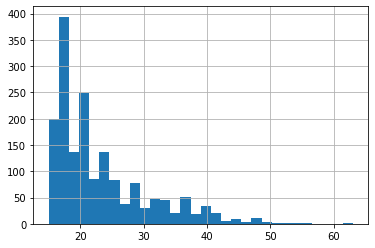

In [14]:
alunosTotal["IDADE"].hist(bins = 30)

### Verificar se existem valores faltantes nos resgistros (nan).

In [15]:
alunosTotal["tipo"].unique()

array(['PF', 'PJ_PF', 'PF_PJ', 'PJ_PF_PJ', 'PF_PJ_PJ', 'PJ_PJ_PF', 'PJ'],
      dtype=object)

In [16]:
# Existem muito mais valores de pessoa física do que as outras ocorrências. 
alunosTotal["tipo"].value_counts()

PF          1605
PF_PJ         25
PJ_PF         24
PF_PJ_PJ      20
PJ_PJ_PF      14
PJ_PF_PJ      13
PJ             3
Name: tipo, dtype: int64

In [17]:
# Não existem valores nan na carga horária.
alunosTotal["carga_horaria"].unique()

array(['1200', '1600', '1300', '1620', '1280', '1150', '900', 'TIGRE',
       '1570', '1400', '1360', '960', '800', '1000', '1320', '1800',
       '1520', '1440', '1250'], dtype=object)

In [18]:
# Não existem valores faltantes na colua CURSO
alunosTotal["produto_educacao"].unique()

array(['AUTOMACAO', 'FABRICACAO', 'LOGISTICA', 'MECANICA', 'MECATRONICA',
       'INTERNET', 'AUTOMOTIVO', 'PLASTICO', 'QUIMICA', 'INFORMATICA',
       'MODA', 'ELETROTECNICA', 'ELETROMECANICA', 'TEXTIL', 'EDIFICACOES',
       'DESENVOLVIMENTO', 'METALURGIA', 'ADMINISTRACAO',
       'Técnico em Segurança do Trabalho', 'QUALIDADE',
       'DESENVOLVIMENTO_EM'], dtype=object)

In [19]:
# Extração dos registros apenas de estudantes que finalizaram o curos
alunosFinal = alunosTotal[(alunosTotal["situacao_matricula"] == "Concluinte")]


In [20]:
alunosFinal = pd.DataFrame(alunosFinal)

In [21]:
alunosFinal.head()

,produto_educacao,carga_horaria,turno,gratuidade_turma,tipo,online,bairro,cidade,genero,escolaridade,situacao_ocupacional,situacao_matricula,IDADE,empresa
0,AUTOMACAO,1200,Tarde,Mista,PF,Nao,Aventureiro,Joinville,M,Medio_C,Empregado,Concluinte,21,Schulz
1,FABRICACAO,1600,Noite,Mista,PF,Nao,Jardim_Paraiso,Joinville,M,Medio_C,Empregado,Concluinte,18,N_D
2,LOGISTICA,1300,Noite,Mista,PF,Nao,ForaJoinville,SaoFrancisco_Sul,M,Medio_C,Empregado,Concluinte,18,SENAI/SC
3,AUTOMACAO,1600,Tarde,Mista,PF,Nao,Aventureiro,Joinville,M,Medio_C,Desempregado,Concluinte,16,N_D
4,MECANICA,1620,Tarde,Mista,PF,Nao,Ulysses_Guimaraes,Joinville,M,Medio_C,Empregado,Concluinte,17,Schulz


In [22]:
alunosFinal.shape

(755, 14)

## Análise do perfil dos estudantes finalizados de todos os cursos técnicos do Senai Joinville
Com os dados limpos, temos agora 898 estudantes que finalizaram.
Vamos fazer algumas medidas e tentar identificar o perfil desses estudantes.

In [23]:
alunosFinal["carga_horaria"].describe()

count      755
unique      15
top       1200
freq       431
Name: carga_horaria, dtype: object

In [24]:
482*100/898

53.67483296213808

In [25]:
102*100/898

11.35857461024499

In [26]:
74*100/898

8.240534521158128

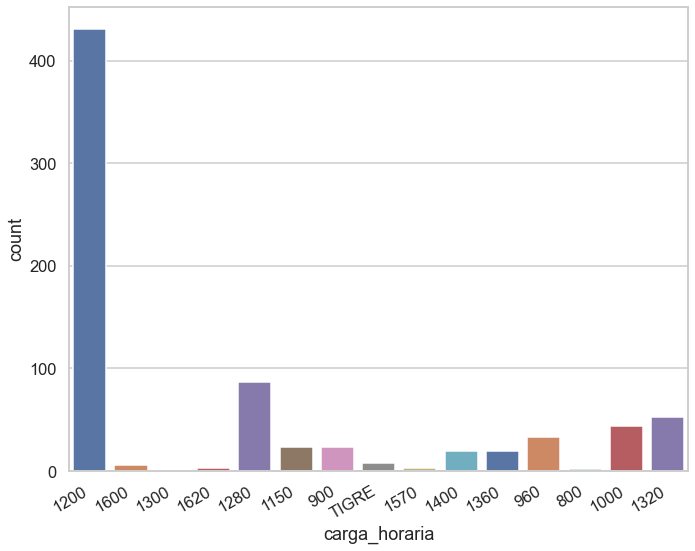

In [27]:
plt.figure(figsize=(10, 8))
sns.set_context("talk")
sns.set_style("whitegrid")

grafCargaHoraria = sns.countplot(x = alunosFinal['carga_horaria'], palette="deep")
grafCargaHoraria.set_xticklabels(grafCargaHoraria.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.savefig("carga_horaria.png")
plt.show()

In [28]:
alunosFinal["produto_educacao"].value_counts()

AUTOMOTIVO         105
PLASTICO            94
MECATRONICA         86
INFORMATICA         72
MECANICA            62
METALURGIA          53
FABRICACAO          48
LOGISTICA           34
QUIMICA             31
INTERNET            27
DESENVOLVIMENTO     26
AUTOMACAO           25
MODA                25
TEXTIL              19
ELETROTECNICA       18
ADMINISTRACAO       14
ELETROMECANICA       8
EDIFICACOES          8
Name: produto_educacao, dtype: int64

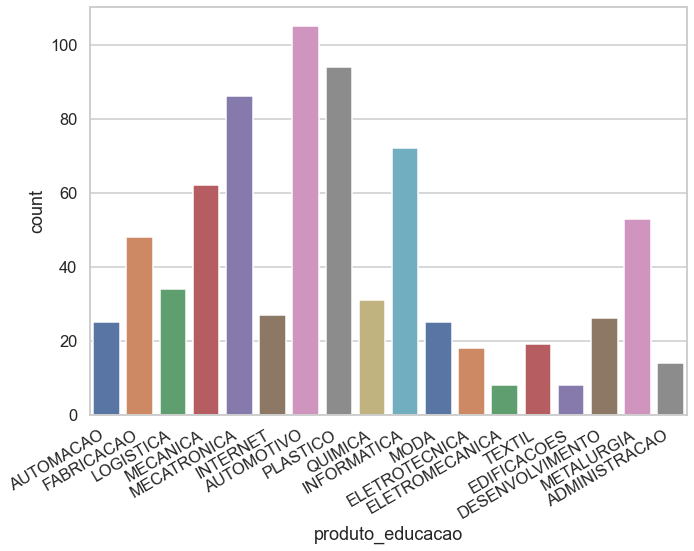

In [29]:
plt.figure(figsize=(10, 8))
grafCurso = sns.countplot(x = alunosFinal['produto_educacao'], palette="deep")
grafCurso.set_xticklabels(grafCurso.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.savefig("curso.png")
plt.show()

In [30]:
valores = alunosFinal["produto_educacao"].value_counts()

In [31]:
len(valores)

18

In [32]:
for i in range(0,len(valores)):
    p = (valores[i]*100)/898
    print(valores.index[i], p)

AUTOMOTIVO 11.692650334075724
PLASTICO 10.46770601336303
MECATRONICA 9.57683741648107
INFORMATICA 8.017817371937639
MECANICA 6.904231625835189
METALURGIA 5.902004454342984
FABRICACAO 5.3452115812917596
LOGISTICA 3.7861915367483294
QUIMICA 3.4521158129175946
INTERNET 3.0066815144766146
DESENVOLVIMENTO 2.89532293986637
AUTOMACAO 2.7839643652561246
MODA 2.7839643652561246
TEXTIL 2.115812917594655
ELETROTECNICA 2.0044543429844097
ADMINISTRACAO 1.55902004454343
ELETROMECANICA 0.89086859688196
EDIFICACOES 0.89086859688196


### Informática: 11,69%
### Plástico: 10,46% cada
### Mecatrônica: 9,57%

In [33]:
alunosFinal["turno"].value_counts()

Noite    464
Tarde    206
Manha     79
EAD        6
Name: turno, dtype: int64

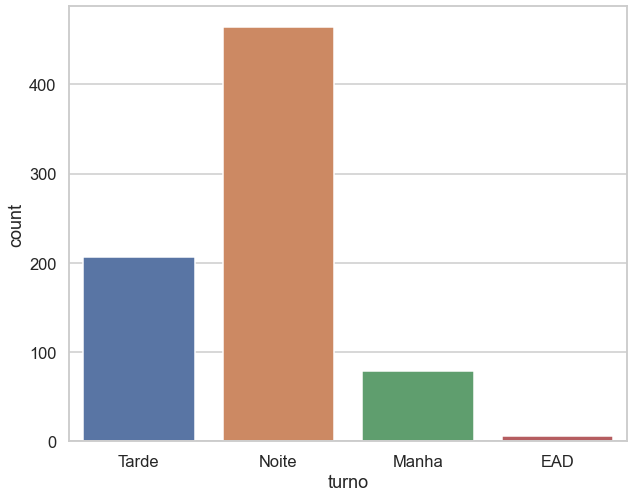

In [34]:
plt.figure(figsize=(10, 8))
sns.countplot(x = alunosFinal['turno'], palette="deep")
plt.savefig("turno.png")

In [35]:
# Cálculos
valores = alunosFinal["turno"].value_counts()
for i in range(0,len(valores)):
    p = (valores[i]*100)/898
    print(valores.index[i], p)

Noite 51.670378619153674
Tarde 22.93986636971047
Manha 8.797327394209354
EAD 0.6681514476614699


### Noite: 51,7%
### Tarde: 22,9%
### Manhã: 8,8%
### EaD: 0,67%

In [36]:
alunosTotal["tipo"].value_counts()

PF          1605
PF_PJ         25
PJ_PF         24
PF_PJ_PJ      20
PJ_PJ_PF      14
PJ_PF_PJ      13
PJ             3
Name: tipo, dtype: int64

In [37]:
# Cálculos
valores = alunosFinal["tipo"].value_counts()
for i in range(0,len(valores)):
    p = (valores[i]*100)/898
    print(valores.index[i], p)


PF 74.72160356347439
PF_PJ 2.4498886414253898
PJ_PF 2.2271714922048997
PF_PJ_PJ 1.78173719376392
PJ_PF_PJ 1.447661469933185
PJ_PJ_PF 1.447661469933185


### PF: 74,72%
### PJ, PF: 2,22%
### PF, PJ: 2,44%
### PF, PJ, PJ: 1,78%
### PJ, PF, PJ: 1,45%
### PJ, PJ, PF: 1,45%

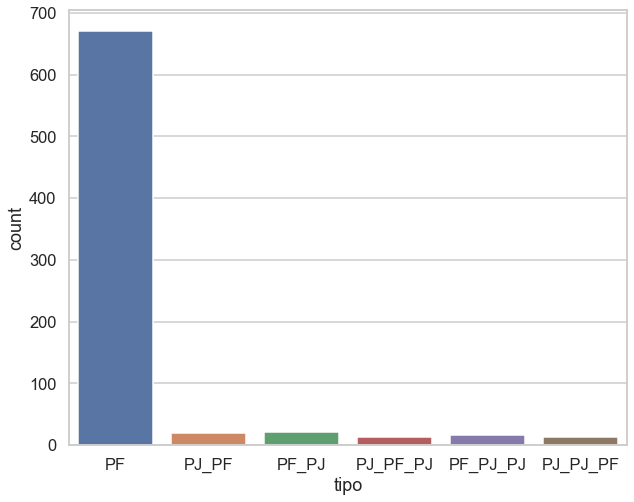

In [38]:
plt.figure(figsize=(10, 8))
sns.countplot(x = alunosFinal['tipo'], palette="deep")
plt.savefig("tipo.png")

In [39]:
# Cálculos
valores = alunosFinal["cidade"].value_counts()
for i in range(0,len(valores)):
    p = (valores[i]*100)/898
    print(valores.index[i], p)

Joinville 78.50779510022272
Araquari 1.55902004454343
Garuva 1.1135857461024499
SaoFrancisco_Sul 0.44543429844098
Barra_Velha 0.44543429844098
Bal_Barra_Sul 0.44543429844098
Jaragua_Sul 0.33407572383073497
Itapoa 0.33407572383073497
Guaratuba 0.22271714922049
Schroeder 0.111358574610245
Concordia 0.111358574610245
Bombinhas 0.111358574610245
Guaramirim 0.111358574610245
Pinheiro_Preto 0.111358574610245
Penha 0.111358574610245


### Joinville: 78,51%
### Araquari: 1,55%
### Garuva: 1,11%
### São Francisco do Sul: 0,44%

In [40]:
# Fazer um dataset apenas com as cidades que tem mais do que 10 ocorrências.
# Extração dos registros de estudantes que estão cursando
joinville = alunosFinal[(alunosFinal["cidade"] == "Joinville")]
araquari = alunosFinal[(alunosFinal["cidade"] == "Araquari")]
garuva = alunosFinal[(alunosFinal["cidade"] == "Garuva")]

grupoCidades = [joinville, araquari, garuva]
Cidades = pd.concat(grupoCidades)

### Gráfico com as cidades que têm mais do que 1 registro.

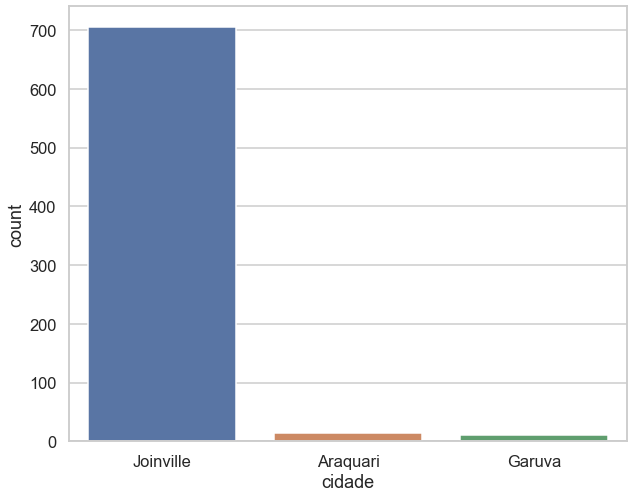

In [41]:
plt.figure(figsize=(10, 8))
sns.countplot(x = Cidades['cidade'], palette="deep")
plt.savefig("cidade.png")

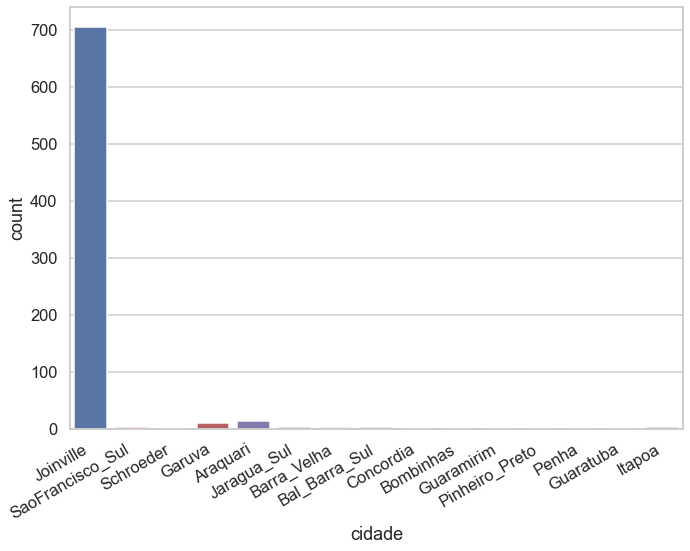

In [42]:
plt.figure(figsize=(10, 8))
grafCurso = sns.countplot(x = alunosFinal['cidade'], palette="deep")
grafCurso.set_xticklabels(grafCurso.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.savefig("cidade2.png")
plt.show()

In [43]:
# Extração dos registros de estudantes que moravam em Joinville no momento da matrícula, para pegar apenas os bairros de Joinville.
bairrosJoinville = alunosFinal[(alunosFinal["cidade"] == "Joinville")]

In [44]:
bairrosJoinville.shape

(705, 14)

In [45]:
bairrosJoinville["bairro"].value_counts()

Aventureiro          58
Vila_Nova            56
Costa_e_Silva        46
Pirabeiraba          42
Jardim_Iririu        35
Boehmerwald          33
Jardim_Paraiso       30
Comasa               29
Floresta             27
Paranaguamirim       26
Bom_Retiro           23
Iririu               20
Joao_Costa           20
Boa_Vista            20
Petropolis           17
Itaum                16
Espinheiros          16
Nova_Brasilia        15
Morro_Meio           15
Guanabara            14
Adhemar_Garcia       14
Saguacu              13
Santo_Antonio        13
America              12
Parque_Guarani       10
Jarivatuba           10
Gloria                9
Fatima                9
Ulysses_Guimaraes     9
Jardim_Sofia          9
Itinga                8
Santa_Catarina        8
Sao_Marcos            4
Vila_Cubatao          4
Anita_Garibaldi       3
Zona_Industrial_N     3
Profipo               3
Bucarein              3
Centro                2
Atiradores            1
Name: bairro, dtype: int64

In [46]:
# Cálculos
valores = bairrosJoinville["bairro"].value_counts()
for i in range(0,len(valores)):
    p = (valores[i]*100)/803
    print(valores.index[i], p)

Aventureiro 7.22291407222914
Vila_Nova 6.973848069738481
Costa_e_Silva 5.72851805728518
Pirabeiraba 5.23038605230386
Jardim_Iririu 4.35865504358655
Boehmerwald 4.109589041095891
Jardim_Paraiso 3.7359900373599
Comasa 3.61145703611457
Floresta 3.3623910336239105
Paranaguamirim 3.2378580323785804
Bom_Retiro 2.86425902864259
Iririu 2.4906600249066004
Joao_Costa 2.4906600249066004
Boa_Vista 2.4906600249066004
Petropolis 2.1170610211706102
Itaum 1.9925280199252802
Espinheiros 1.9925280199252802
Nova_Brasilia 1.86799501867995
Morro_Meio 1.86799501867995
Guanabara 1.7434620174346203
Adhemar_Garcia 1.7434620174346203
Saguacu 1.6189290161892902
Santo_Antonio 1.6189290161892902
America 1.4943960149439601
Parque_Guarani 1.2453300124533002
Jarivatuba 1.2453300124533002
Gloria 1.1207970112079702
Fatima 1.1207970112079702
Ulysses_Guimaraes 1.1207970112079702
Jardim_Sofia 1.1207970112079702
Itinga 0.9962640099626401
Santa_Catarina 0.9962640099626401
Sao_Marcos 0.49813200498132004
Vila_Cubatao 0.498132

### Costa e Silva:  5,72%
### Aventureiro: 7,22%
### Vila Nova: 6,97%
### Pirabeiraba: 5,23%


In [47]:
# Fazer um dataset apenas com os bairros de Joinville que tem 30 ou mais ocorrências
# Extração dos registros de estudantes que estão cursando
costaESilva = alunosFinal[(alunosFinal["bairro"] == "Costa_e_Silva")]
aventureiro = alunosFinal[(alunosFinal["bairro"] == "Aventureiro")]
vilaNova = alunosFinal[(alunosFinal["bairro"] == "Vila_Nova")]
pirabeiraba = alunosFinal[(alunosFinal["bairro"] == "Pirabeiraba")]
jardimIririu = alunosFinal[(alunosFinal["bairro"] == "Jardim_Iririu")]
jardimParaiso = alunosFinal[(alunosFinal["bairro"] == "Jardim_Paraiso")]
boehmerwald = alunosFinal[(alunosFinal["bairro"] == "Boehmerwald")]

grupoBairros = [costaESilva, aventureiro, vilaNova, pirabeiraba, jardimIririu, jardimParaiso, boehmerwald]
Bairros = pd.concat(grupoBairros)

### Considerando apenas os bairros de Joinville, gráfico dos bairros que tem 30 ou mais registros.

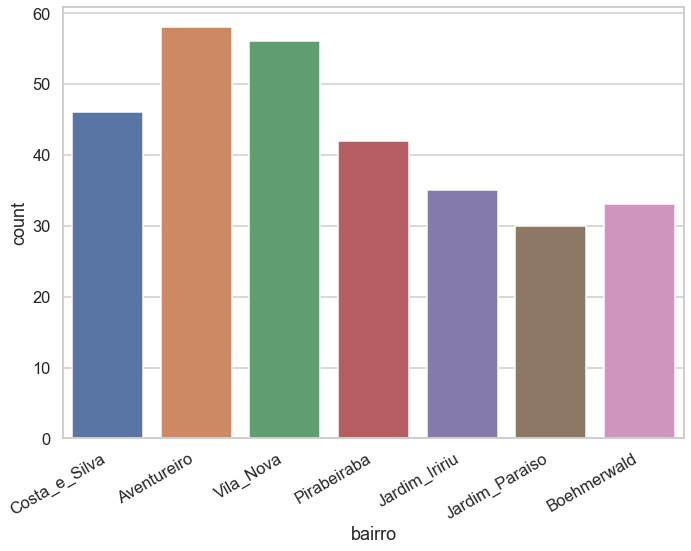

In [48]:
plt.figure(figsize=(10, 8))
grafCurso = sns.countplot(x = Bairros['bairro'], palette="deep")
grafCurso.set_xticklabels(grafCurso.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.savefig("bairro.png")
plt.show()

In [49]:
alunosFinal["genero"].value_counts()

M    631
F    124
Name: genero, dtype: int64

In [50]:
# Cálculos
valores = alunosFinal["genero"].value_counts()
for i in range(0,len(valores)):
    p = (valores[i]*100)/898
    print(valores.index[i], p)

M 70.26726057906458
F 13.808463251670378


### Do total de estudantes que se formaram, 70,26% são homens e 13,81% são mulheres.

In [51]:
# Todos os estudantes formados no técnico em mecatrônica nos registros tinham apenas o ensino médio completo.
alunosFinal["escolaridade"].value_counts()

Medio_C       749
Superior_C      3
Medio_I         2
Superior_I      1
Name: escolaridade, dtype: int64

In [52]:
# Cálculos
valores = alunosFinal["escolaridade"].value_counts()
for i in range(0,len(valores)):
    p = (valores[i]*100)/898
    print(valores.index[i], p)

Medio_C 83.4075723830735
Superior_C 0.33407572383073497
Medio_I 0.22271714922049
Superior_I 0.111358574610245


### Estudantes formados que tem o ensino médio completo em 99,1% dos registros.
### Estudante com Superior incompleto são 0,44% dos casos.

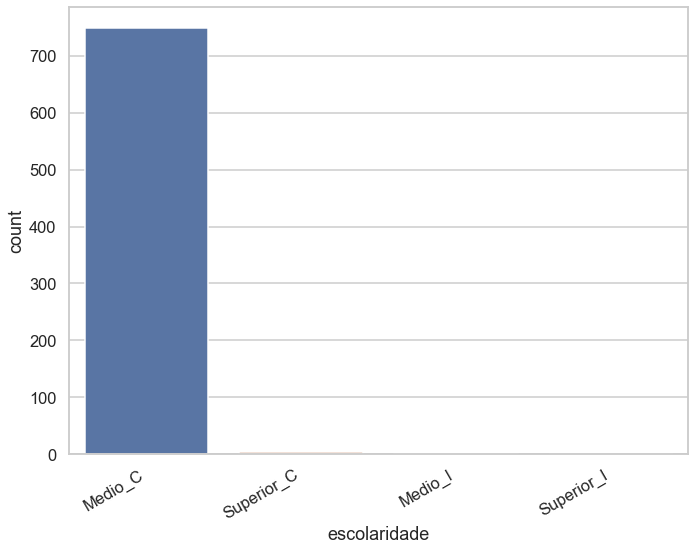

In [53]:
plt.figure(figsize=(10, 8))
grafEscolaridade = sns.countplot(x = alunosFinal['escolaridade'], palette="deep")
grafEscolaridade.set_xticklabels(grafEscolaridade.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.savefig("escolaridade.png")
plt.show()

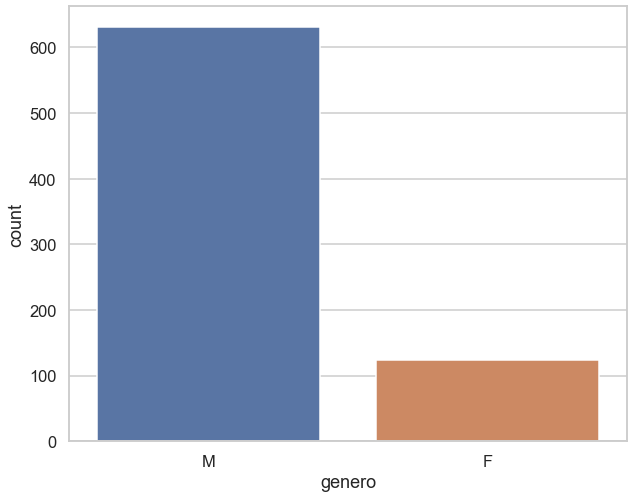

In [54]:
plt.figure(figsize=(10, 8))
sns.countplot(x = alunosFinal['genero'], palette="deep")
plt.savefig("genero.png")

In [55]:
alunosFinal.columns

Index(['produto_educacao', 'carga_horaria', 'turno', 'gratuidade_turma',
       'tipo', 'online', 'bairro', 'cidade', 'genero', 'escolaridade',
       'situacao_ocupacional', 'situacao_matricula', 'IDADE', 'empresa'],
      dtype='object')

In [56]:
alunosFinal["situacao_ocupacional"].value_counts()

Empregado       424
Desempregado    331
Name: situacao_ocupacional, dtype: int64

In [57]:
# Cálculos
valores = alunosFinal["situacao_ocupacional"].value_counts()
for i in range(0,len(valores)):
    p = (valores[i]*100)/898
    print(valores.index[i], p)

Empregado 47.216035634743875
Desempregado 36.85968819599109


### Os estudantes que estavam desempregados no momento da matrícula e finalizaram são 50,78% do total.
### Empregados somam 49,22%.

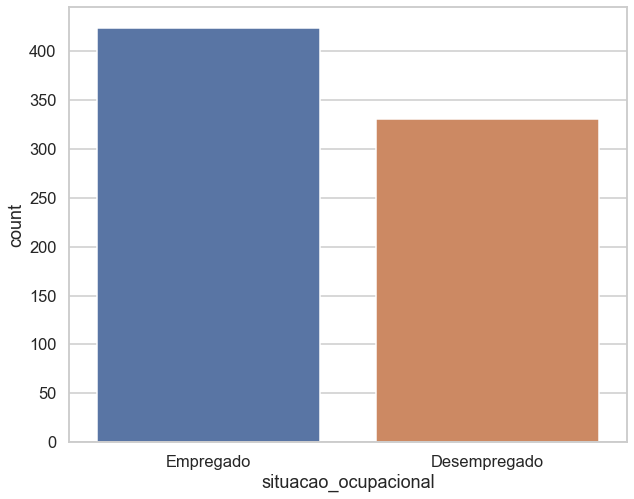

In [58]:
plt.figure(figsize=(10, 8))
sns.countplot(x = alunosFinal['situacao_ocupacional'], palette="deep")
plt.savefig("sit_ocupacional.png")

In [59]:
alunosFinal["empresa"].value_counts()

N_D          486
TUPY          61
TAF           27
DOHLER        16
Embraco       13
            ... 
AB_PLAST       1
AB             1
TECELAGEM      1
SOLO           1
LEAS           1
Name: empresa, Length: 86, dtype: int64

In [60]:
# Como existem muitos registros de empresas não declaradas, vamos criar um data frame só com os registros que tem empresas.
empresas = alunosFinal[(alunosFinal["empresa"] != "N_DECLARADO")]

In [61]:
EmpresasDF = pd.DataFrame(empresas)

In [62]:
EmpresasDF

,produto_educacao,carga_horaria,turno,gratuidade_turma,tipo,online,bairro,cidade,genero,escolaridade,situacao_ocupacional,situacao_matricula,IDADE,empresa
0,AUTOMACAO,1200,Tarde,Mista,PF,Nao,Aventureiro,Joinville,M,Medio_C,Empregado,Concluinte,21,Schulz
1,FABRICACAO,1600,Noite,Mista,PF,Nao,Jardim_Paraiso,Joinville,M,Medio_C,Empregado,Concluinte,18,N_D
2,LOGISTICA,1300,Noite,Mista,PF,Nao,ForaJoinville,SaoFrancisco_Sul,M,Medio_C,Empregado,Concluinte,18,SENAI/SC
3,AUTOMACAO,1600,Tarde,Mista,PF,Nao,Aventureiro,Joinville,M,Medio_C,Desempregado,Concluinte,16,N_D
4,MECANICA,1620,Tarde,Mista,PF,Nao,Ulysses_Guimaraes,Joinville,M,Medio_C,Empregado,Concluinte,17,Schulz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,MECATRONICA,1200,Noite,Mista,PF,Sim,ForaJoinville,Araquari,M,Medio_C,Empregado,Concluinte,19,N_D
751,METALURGIA,1320,Manha,Pago_PJ,PF,Nao,Espinheiros,Joinville,M,Medio_C,Empregado,Concluinte,32,TUPY
752,METALURGIA,1320,Tarde,Regimental,PF,Nao,Santa_Catarina,Joinville,M,Medio_C,Empregado,Concluinte,24,TUPY
753,METALURGIA,1320,Tarde,Regimental,PF,Nao,Paranaguamirim,Joinville,M,Medio_C,Empregado,Concluinte,29,TUPY


In [63]:
# Cálculos
valores = EmpresasDF["empresa"].value_counts()
for i in range(0,len(valores)):
    p = (valores[i]*100)/296
    print(valores.index[i], p)

N_D 164.1891891891892
TUPY 20.60810810810811
TAF 9.121621621621621
DOHLER 5.405405405405405
Embraco 4.391891891891892
KRONA 3.0405405405405403
Tigre 2.7027027027027026
CRISTAL 2.364864864864865
Schulz 2.364864864864865
Whirlpool 2.027027027027027
DOCOL 2.027027027027027
PLASBOHN 1.6891891891891893
UNIPLAST 1.3513513513513513
Comfio 1.3513513513513513
Britânia 1.3513513513513513
SULBRAS 1.3513513513513513
DURIN 1.3513513513513513
Garuva 1.0135135135135136
COMPONENT_EQUIPAMENTOS 1.0135135135135136
SEW-EURODRIVE 1.0135135135135136
ILPEA 0.6756756756756757
Wetzel 0.6756756756756757
PONTEIRAS 0.6756756756756757
LINKPLAS 0.6756756756756757
ERZINGER 0.6756756756756757
INCASA 0.6756756756756757
MALHARIA 0.6756756756756757
CCP 0.6756756756756757
MILIUM 0.6756756756756757
Ciser 0.33783783783783783
BOREAL 0.33783783783783783
EMBALE 0.33783783783783783
Cr 0.33783783783783783
LUNELLI 0.33783783783783783
IBT 0.33783783783783783
BK 0.33783783783783783
KONARDI 0.33783783783783783
Coltex 0.337837837837

## Dos registros declarados das empresas
### Tupy: 20,60%
### TAF: 9,12%
### Dohler: 5,40%
### Embraco: 4,39%
### KRONA: 3,04%

In [64]:
# Fazer um gráfico apenas com as 5 empresas com mais registros.
# Extração dos registros de estudantes que estão cursando
tupy = EmpresasDF[(EmpresasDF["empresa"] == "TUPY")]
taf = EmpresasDF[(EmpresasDF["empresa"] == "TAF")]
dohler = EmpresasDF[(EmpresasDF["empresa"] == "DOHLER")]
embraco = EmpresasDF[(EmpresasDF["empresa"] == "Embraco")]
krona = EmpresasDF[(EmpresasDF["empresa"] == "KRONA")]

grupoEmpresas = [tupy,taf, dohler, embraco, krona]
Empresas = pd.concat(grupoEmpresas)

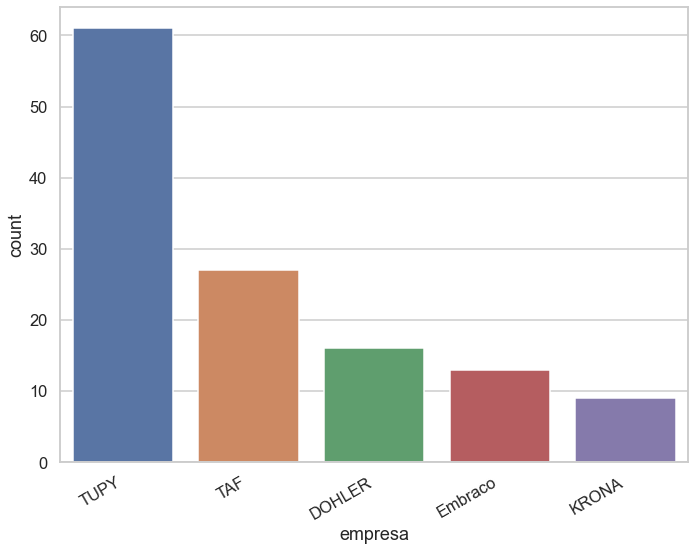

In [65]:
# Agora fazer um gráfico com as empresas:
plt.figure(figsize=(10, 8))
grafEmpresas = sns.countplot(x = Empresas['empresa'], palette="deep")
grafEmpresas.set_xticklabels(grafEmpresas.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.savefig("empresa.png")
plt.show()


In [66]:
alunosFinal.columns

Index(['produto_educacao', 'carga_horaria', 'turno', 'gratuidade_turma',
       'tipo', 'online', 'bairro', 'cidade', 'genero', 'escolaridade',
       'situacao_ocupacional', 'situacao_matricula', 'IDADE', 'empresa'],
      dtype='object')

In [67]:
# Correção do tipo de desconto
for i in range(0,len(alunosFinal["tipo"])):
    if alunosFinal.iloc[i,10] == "Trabalhador Indústria":
        alunosFinal.iloc[i,10] = "Trabalhador da Indústria"

In [68]:
alunosFinal["IDADE"].describe()

count    755.000000
mean      23.184106
std        7.754472
min       15.000000
25%       17.000000
50%       20.000000
75%       28.000000
max       54.000000
Name: IDADE, dtype: float64

In [69]:
alunosFinal["IDADE"].mode()

0    17
dtype: int64

### Pode-se ver que a média de idade dos estudantes que se formaram  fica em torno de 22,45 anos.
### E 75% dos estudantes formados tem menos do que 26 anos.

<AxesSubplot:>

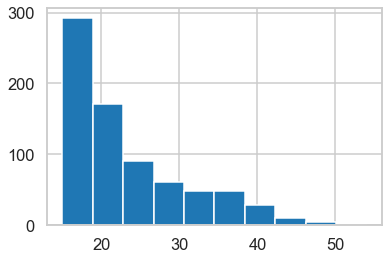

In [70]:
alunosFinal["IDADE"].hist()

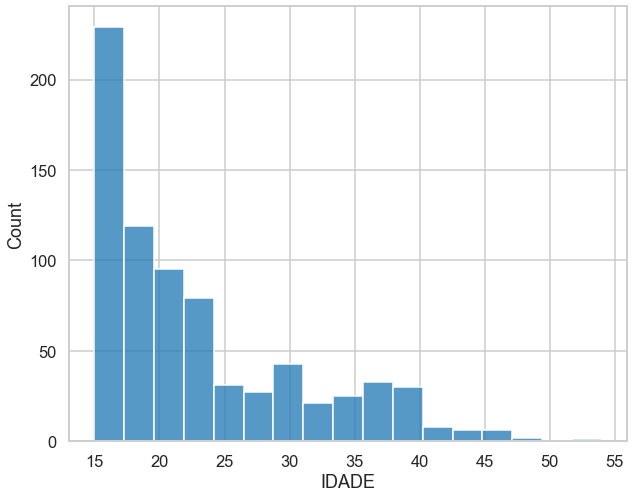

In [71]:
# Agora fazer um gráfico com as idades:
plt.figure(figsize=(10, 8))
sns.histplot(data=alunosFinal, x="IDADE")
plt.savefig("idade.png")